# 1.1 Color Reconstruction (1+5+13+1=20)

As mentioned in the lecture, one way to sense color is to take photos of a scene with different color filters and reconstruct the original color information by combining those photos afterwards. In this exercise you shall work on the example from the lecture. You are given 3 grayscale images, representing the red, green and blue channel respectively (see Figure 1). For the sake of simplicity and fun of experimenting, a small GUI is provided that allows for comfortable adjustment of the different channel offsets.


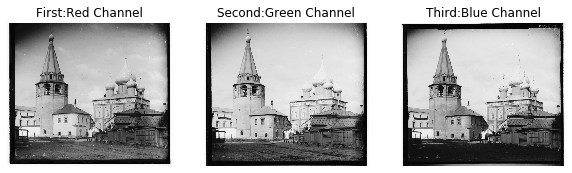

_Figure 1: Scene photographed with 3 different color filters._

Your task is to implement the underlying functionality:
* a) set the path to the right location, to where the .pgm files are located.
* b) Add the necessary commands to load the grayscale images in the section load.
* c) Implement the function reconstruct(r,g,b) that accepts the 3 grayscale images r, g and b and returns a rgb-image represented in a 3 dimensional array with dimensions (height × width × 3) in the section reconstruction.
* d) display all red, green, blue and your reconstructed color image by simply calling the display function in the display section.



In [3]:
# import libraries
import os

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import imageio

### a)
Set the __pgm_path__ to the location of pgm files in the Exercise folder like the example below:

In [1]:
# define paths
pgm_path = "images/"

In [47]:
# Helper functions
# read .pgm file format
def readpgm(name: str):  # Read picture
    with open(name) as f:
        lines = f.readlines()
        
    # Ignores commented lines
    for l in list(lines):
        if l[0] == "#":
            lines.remove(l)

    # Makes sure it is ASCII format (P2)
    assert lines[0].strip() == "P2"

    # Converts data to a list of integers
    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])  # Read data

    data_ = np.zeros(((data[0]), data[1]))

    return (np.array(data[3:]), (data[1], data[0]), data[2])


def display(data1, data2, data3, data4):  # create figure
    data1 = (data1 / 255).astype("float32")
    data2 = (data2 / 255).astype("float32")
    data3 = (data3 / 255).astype("float32")
    data4 = (data4 / 255).astype("float32")

    fig = plt.figure(figsize=(10, 7))
    # setting values to rows and column variables
    rows = 2
    columns = 2

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    # showing image
    plt.imshow(data1)
    plt.axis("off")
    plt.title("First:Red Channel")

    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
    # showing image
    plt.imshow(data2)
    plt.axis("off")
    plt.title("Second:Green Channel")

    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)
    # showing image
    plt.imshow(data3)
    plt.axis("off")
    plt.title("Third:Blue Channel")
    
    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)
    # showing image
    plt.imshow(data4)
    plt.axis("off")
    plt.title("Fourth: Color Image")



### b)
Load red, green, and Blue channel images here:

In [35]:
import numpy as np
# Load the data here:
# After loading the data a reshape of first and second dimension is needed (use data=np.reshape(data[0],data[1]).
def loadData():
    files = ["red.pgm", "green.pgm", "blue.pgm"]
    
    data = readpgm(pgm_path + files[0])
    data = np.reshape(data[0],data[1])
    global red
    red = data
    
    data = readpgm(pgm_path + files[1])
    data = np.reshape(data[0],data[1])
    global green
    green = data
    
    data = readpgm(pgm_path + files[2])
    data = np.reshape(data[0],data[1])
    global blue
    blue = data
    print(blue)
    print(len(blue))
    print(len(blue[0]))
    high = 0
    low = 0
        
loadData()
        

[[248 249 250 ... 250 250 250]
 [249 249 249 ... 250 250 250]
 [249 249 249 ... 250 250 250]
 ...
 [247 247 246 ... 250 250 250]
 [248 247 246 ... 250 250 250]
 [247 246 247 ... 250 250 250]]
639
733


### c)
Reconstruct color image here:

In [45]:

# Implement 'reconstruct' function.
# Reconstruct color image from 3 r,g, b channels here:
def reconstruct():
    global rgb_image
    #rgb_image = [[[] for _ in range(len(red[0]))] for _ in range(len(red))]
    rgb_image = np.empty((len(red), len(red[0]), 3), dtype=object)
    for x in range(len(red)):
        for y in range(len(red[x])):
            rgb_image[x][y] = [red[x][y], green[x][y], blue[x][y]]
# Reconstruct color image from 3 red, blue, and green images by calling reconstruct function here:
reconstruct()


### d)
Display red, green, blue, and color images by calling display function here:

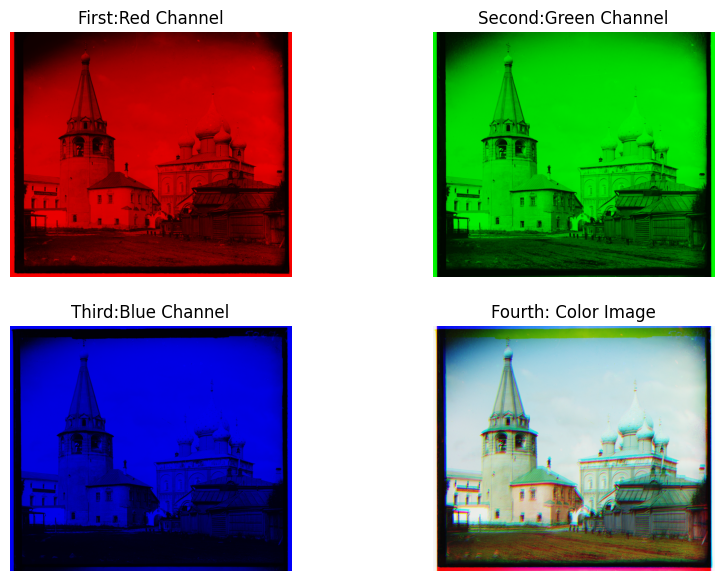

In [49]:
import matplotlib.pyplot as plt
# Call display function here:
# Display red,blue, green and their color combination results
rgb_red = np.empty((len(red), len(red[0]), 3), dtype=object)
rgb_green = np.empty((len(red), len(red[0]), 3), dtype=object)
rgb_blue = np.empty((len(red), len(red[0]), 3), dtype=object)

for x in range(len(red)):
    for y in range(len(red[x])):
        rgb_red[x][y] = [red[x][y], 0, 0]
        rgb_green[x][y] = [0, green[x][y], 0]
        rgb_blue[x][y] = [0, 0, blue[x][y]]
display(rgb_red, rgb_green, rgb_blue, rgb_image)